### Importing and preprocessing data

In [142]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [143]:
# import data

from sklearn.datasets import load_iris

dataset = load_iris()

df_dataset = pd.DataFrame(np.c_[dataset.data, dataset.target], columns = dataset.feature_names + ['class'] )
df = df_dataset.copy()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [145]:
# Change the types and names of class column

df['class'] = df['class'].astype(int)
df['class_name'] = df['class'].apply(lambda x: list(dataset.target_names)[x] )
df['class_name'] = df['class_name'].astype('category')

df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class_name
82,5.8,2.7,3.9,1.2,1,versicolor
79,5.7,2.6,3.5,1.0,1,versicolor
128,6.4,2.8,5.6,2.1,2,virginica
133,6.3,2.8,5.1,1.5,2,virginica
5,5.4,3.9,1.7,0.4,0,setosa


In [146]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [147]:
# vizualization correlation of feautures 

fig = px.scatter_matrix(df,
    dimensions=["sepal width (cm)", "sepal length (cm)", "petal width (cm)", "petal length (cm)"],
    color="class_name")

fig.update_layout(template='plotly_white', height=700)

fig.show()

In [148]:
# 
from sklearn.model_selection import train_test_split

data = df.iloc[:,:-2]
target = df.loc[:,'class']
X_train, X_test, Y_train, Y_test = train_test_split(data, target, stratify=target, random_state=42)

### K-neighbors classifier

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,10)}

grid_search = GridSearchCV(knn, param_grid)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)

Y_pred = grid_search.predict(X_test)
accuracy_score(Y_test, Y_pred)

{'n_neighbors': 7}


0.9473684210526315

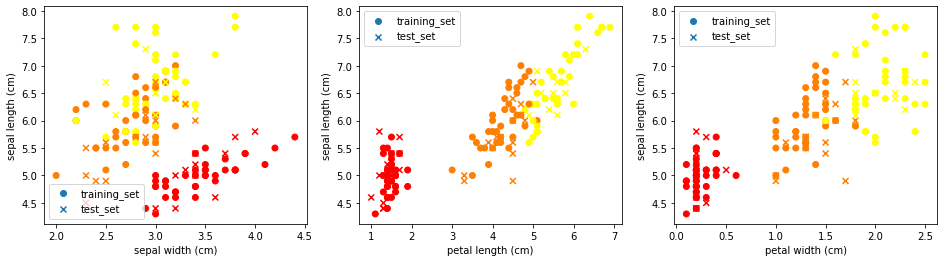

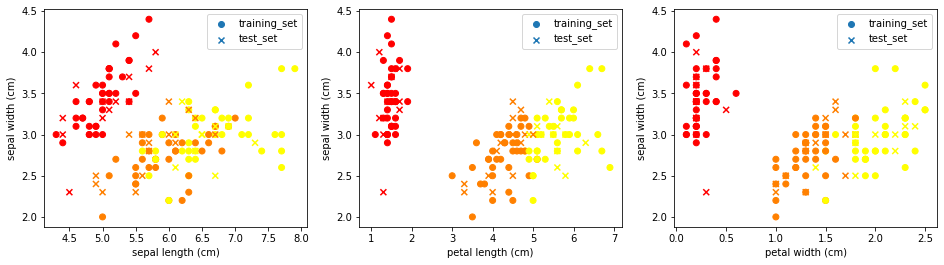

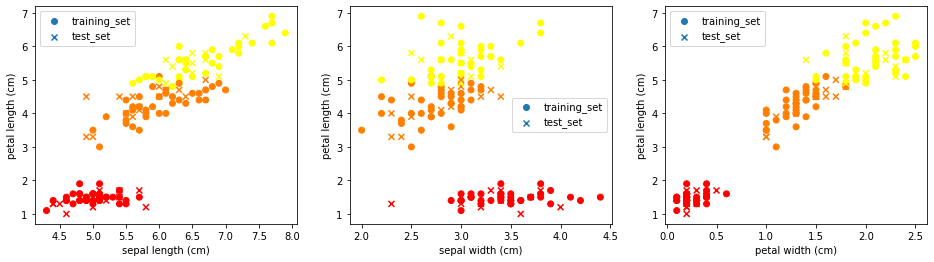

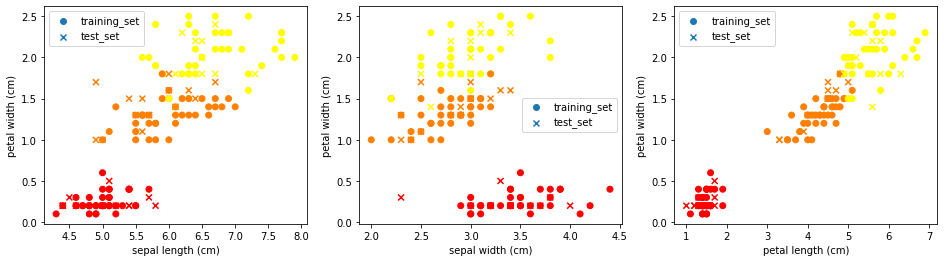

In [150]:
for num in range(len(X_train.columns)):
  columns = list(X_train.columns)
  main_col = columns.pop(num)

  plt.figure(figsize=(16, 4))

  for i, col in enumerate(columns):
      plt.subplot(1, 3 , i+1)
      plt.scatter(X_train[col].values, X_train[main_col].values, c=Y_train, cmap='autumn', label = 'training_set')
      plt.scatter(X_test[col].values, X_test[main_col].values, c=Y_pred, cmap='autumn', marker='x', alpha=1, label='test_set')
      plt.xlabel(col)
      plt.ylabel(main_col)
      plt.legend()


  plt.show()

In [151]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = X_train.values
Y = Y_train

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



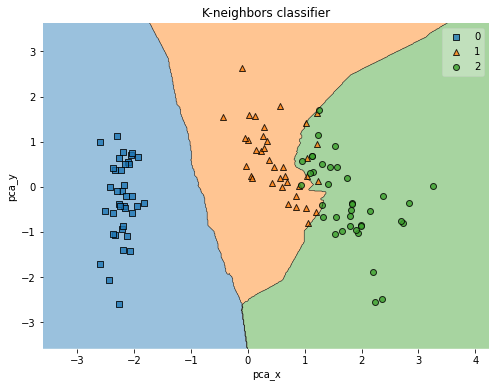

In [152]:
param_grid = {'n_neighbors':np.arange(1,10)}
grid_search = GridSearchCV(knn, param_grid)
grid_search.fit(X_pca,Y)

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions(X_pca, np.array(Y), grid_search, legend=1)
plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.title('K-neighbors classifier')
plt.show()

### Decision tree


In [153]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier()
param_grid = {"max_depth":np.arange(2,20) , 
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}
grid_search = GridSearchCV(tree, param_grid, cv=10)
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

Y_pred = grid_search.predict(X_test)
accuracy_score(Y_test, Y_pred)

{'max_depth': 11, 'min_samples_leaf': 1}


0.9473684210526315

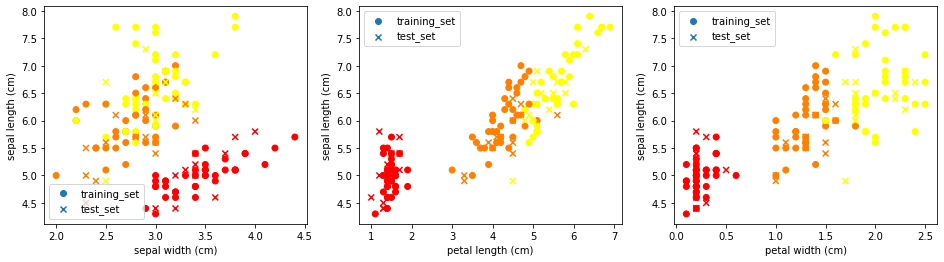

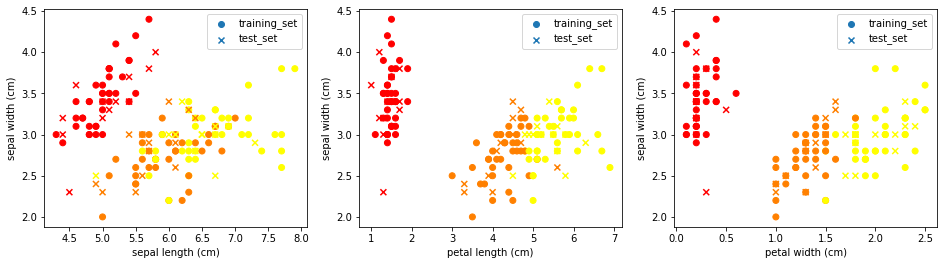

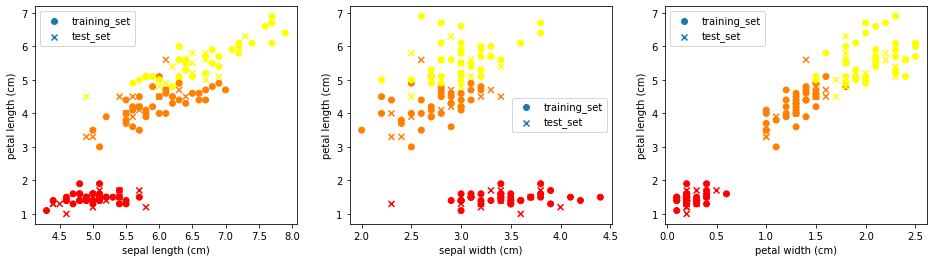

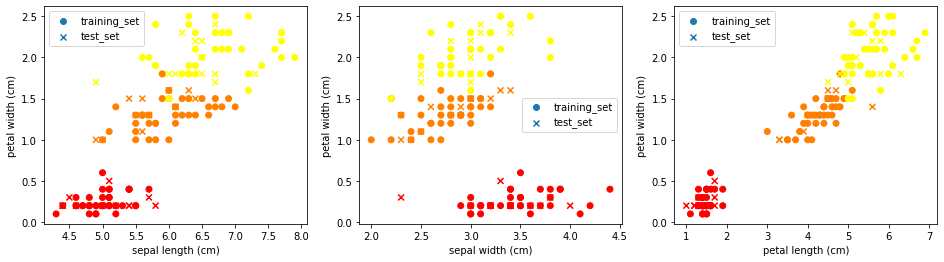

In [154]:
for num in range(len(X_train.columns)):
  columns = list(X_train.columns)
  main_col = columns.pop(num)

  plt.figure(figsize=(16, 4))

  for i, col in enumerate(columns):
      plt.subplot(1, 3 , i+1)
      plt.scatter(X_train[col].values, X_train[main_col].values, c=Y_train, cmap='autumn', label = 'training_set')
      plt.scatter(X_test[col].values, X_test[main_col].values, c=Y_pred, cmap='autumn', marker='x', alpha=1, label='test_set')
      plt.xlabel(col)
      plt.ylabel(main_col)
      plt.legend()


  plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



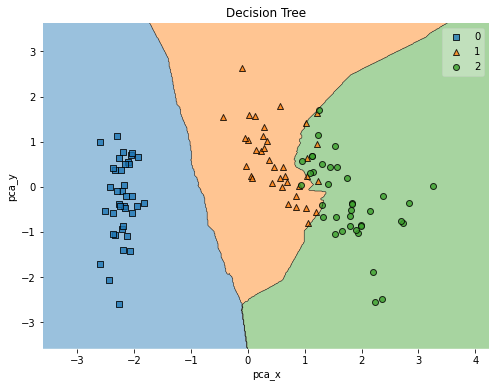

In [155]:
param_grid = {'n_neighbors':np.arange(1,10)}
grid_search = GridSearchCV(knn, param_grid)
grid_search.fit(X_pca,Y)

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions(X_pca, np.array(Y), grid_search, legend=1)
plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.title('Decision Tree')
plt.show()

### Decision Forest

In [156]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier()
param_grid = {"n_estimators":np.arange(2,15)}
grid_search = GridSearchCV(forest, param_grid, cv=10)
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

Y_pred = grid_search.predict(X_test)
accuracy_score(Y_test, Y_pred)

{'n_estimators': 7}


0.8947368421052632

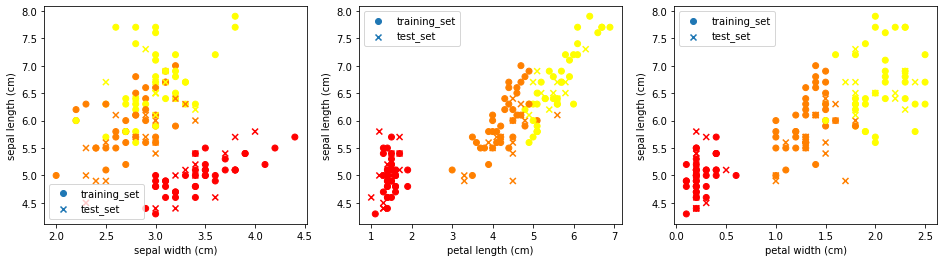

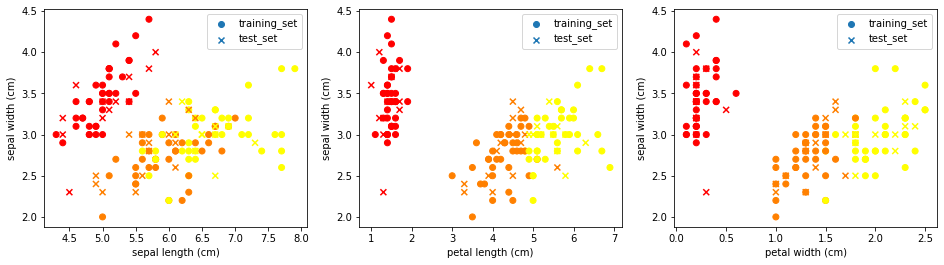

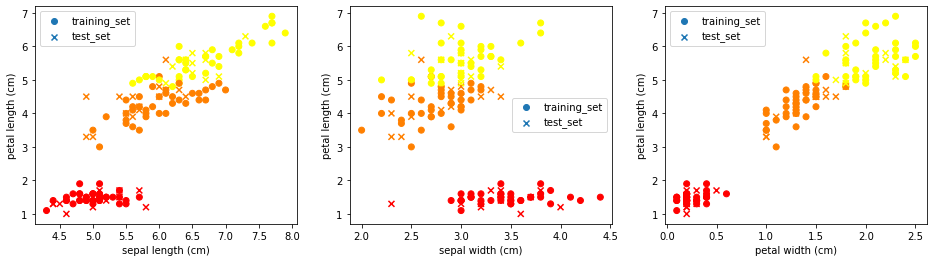

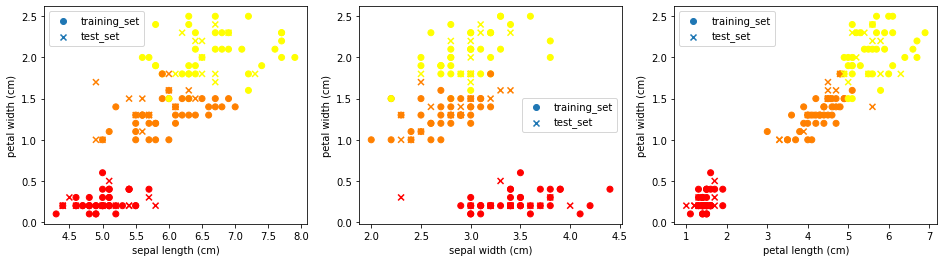

In [157]:
for num in range(len(X_train.columns)):
  columns = list(X_train.columns)
  main_col = columns.pop(num)

  plt.figure(figsize=(16, 4))

  for i, col in enumerate(columns):
      plt.subplot(1, 3 , i+1)
      plt.scatter(X_train[col].values, X_train[main_col].values, c=Y_train, cmap='autumn', label = 'training_set')
      plt.scatter(X_test[col].values, X_test[main_col].values, c=Y_pred, cmap='autumn', marker='x', alpha=1, label='test_set')
      plt.xlabel(col)
      plt.ylabel(main_col)
      plt.legend()


  plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



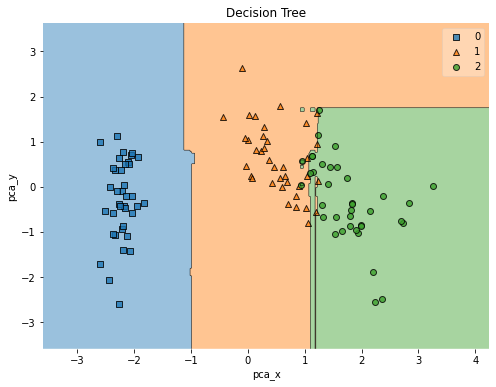

In [158]:
forest = RandomForestClassifier()
param_grid = {"n_estimators":np.arange(2,15)}
grid_search = GridSearchCV(forest, param_grid, cv=10)
grid_search.fit(X_pca,Y)

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions(X_pca, np.array(Y), grid_search, legend=1)
plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.title('Decision Tree')
plt.show()